# <span style="color:lightblue"> DATA SCIENCE AND MACHINE LEARNING INTERNSHIP PROGRAM </span>

<h2><center><u>Assignment_4</u></center><h2>

In [1]:
# Importing useful libraries

#dataFrame manipulation and visualiztion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows', None)

#Needed libraries
import datetime
import math

#Algorithms and scikit learn libraries
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## <span style="color:lightblue"> **Problem Statement 1:** </span>
The data (sample) were collected in São Paulo - Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.

**Dataset Description**
- Data: date of the record
- Temperatura Media (C): Average temperature of the day in celsius
- Temperatura Minima (C): Minimum temperature of the day in celsius
- Temperatura Maxima (C): Maximum temperature of the day in celsius
- Precipitacao (mm): Percipitation in mm
- Final de Semana: If the day is the weekend or not
- Consumo de cerveja (litros): Beer consumption in liters

I would be writing python code to perform the following tasks mentioned:
1. Load the dataset, check its shape
2. Rectify the data of the first four columns
   **Hint:** Check columns 'Temperatura Media(C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)' and 'Precipitacao'<br>
   Fix the following errors present in these features
3. Create new features using the 'Data' feature and the make 'Data' column as index<br>
    **Hint:** Create a new feature 'Month' from the dates, consisting of the month of the year.<br>
    Create a new feature 'Day' from the dates, consisting of the day of the week.
    Set values from the 'Data' column as indexes. Use code snippet:
    `df1.set_index('Data', inplace=True)`
4. Handle null and duplicate values
5. Check the data type of the features and convert them to the appropriate data type
6. Analyse features with outlier values
7. Plot and analyze the correlation
8. Split the datast for training and testing
9. Train a linear regression model and print the intercept and coefficients
10. Evaluate the model using the R2 score, mean absolute error and root mean squared error


#### Beer_df refers to the dataframe for the Consumo_cervea data

In [2]:
beer_df = pd.read_csv("./../Assignment_files/Consumo_cerveja_ass4.csv")
beer_df.shape

(941, 7)

#### creating a date column from the data column of dtype datetime so I can access the dates

In [3]:
date_df = pd.to_datetime(beer_df["Data"])
beer_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


#### Converting the object columns of dtype to floats

In [4]:
for column in beer_df.columns:
    if beer_df[column].dtype == 'object':
        beer_df[column] = beer_df[column].str.replace(",", ".")

#convert columns to numeric dtypes
beer_df = beer_df.apply(pd.to_numeric, errors='coerce')

#convert data to datetime object to be able to extract days, months, time in general
beer_df['Data'] = date_df

In [5]:
beer_df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [6]:
#setting the data column as the index of the dataframe
beer_df.set_index('Data', inplace=True)
beer_df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [7]:
# Creating new features from the datetime column
beer_df['Month'] = pd.DatetimeIndex(date_df).month
beer_df['Day'] = pd.DatetimeIndex(date_df).day_of_week  # The day of the week with Monday=0, Sunday=6
beer_df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1.0,0.0


In [8]:
beer_df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
Month                          float64
Day                            float64
dtype: object

In [9]:
beer_df.duplicated().sum(), len(beer_df)

(575, 941)

More than half of the data is duplicated 

In [10]:
beer_df.drop_duplicates(inplace=True)

In [11]:
beer_df.isna().sum()

Temperatura Media (C)          1
Temperatura Minima (C)         1
Temperatura Maxima (C)         1
Precipitacao (mm)              1
Final de Semana                1
Consumo de cerveja (litros)    1
Month                          1
Day                            1
dtype: int64

After removing duplicate entries I would drop the missing row because its just one.

In [12]:
beer_df.dropna(axis=0, inplace=True)
beer_df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1.0,0.0


In [13]:
beer_df.isna().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64

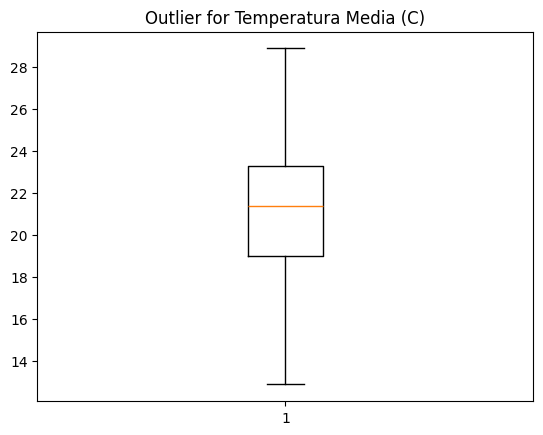

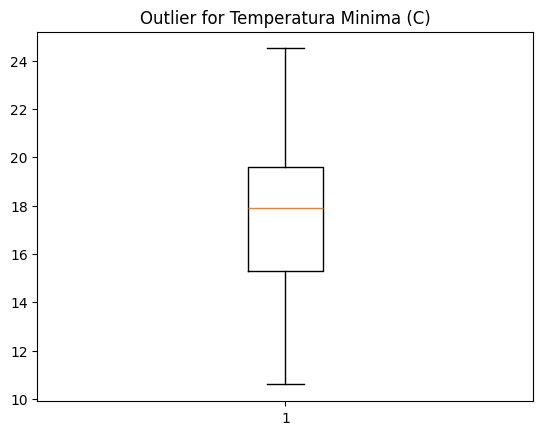

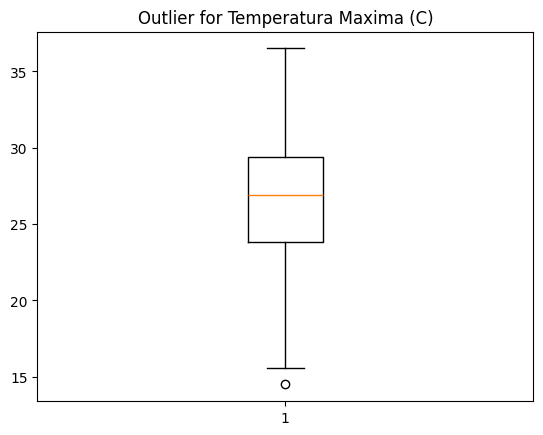

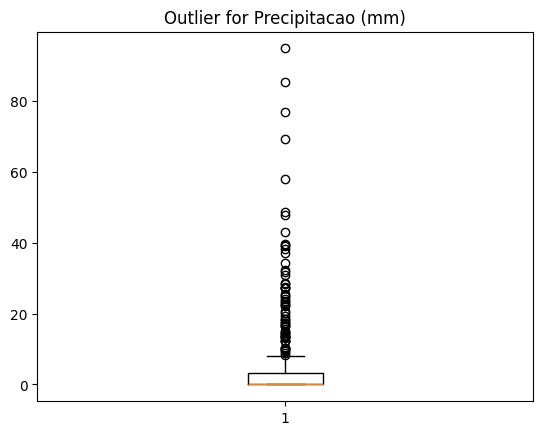

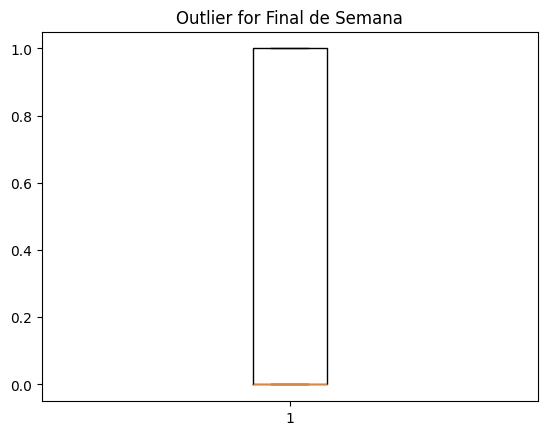

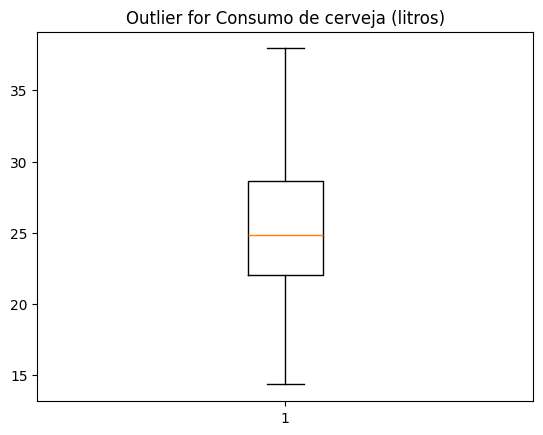

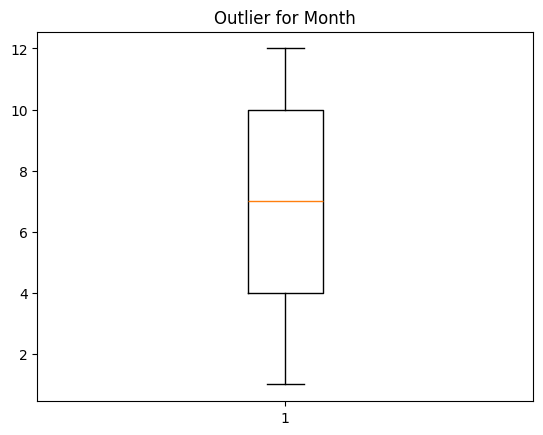

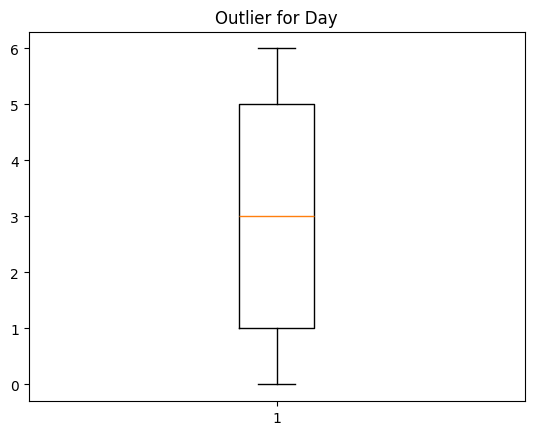

In [14]:
for column in beer_df.columns:
    fig, ax = plt.subplots()
    plt.boxplot(beer_df[column])
    ax.set_title(f"Outlier for {column}")

In [15]:
beer_df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615,-0.103169,-0.018669
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509,-0.172923,-0.016574
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672,-0.074866,-0.020871
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784,0.007089,-0.063284
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981,-0.006526,0.790137
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000,0.039908,0.413826
Month,-0.103169,-0.172923,-0.074866,0.007089,-0.006526,0.039908,1.000000,-0.009549
Day,-0.018669,-0.016574,-0.020871,-0.063284,0.790137,0.413826,-0.009549,1.000000


<Axes: >

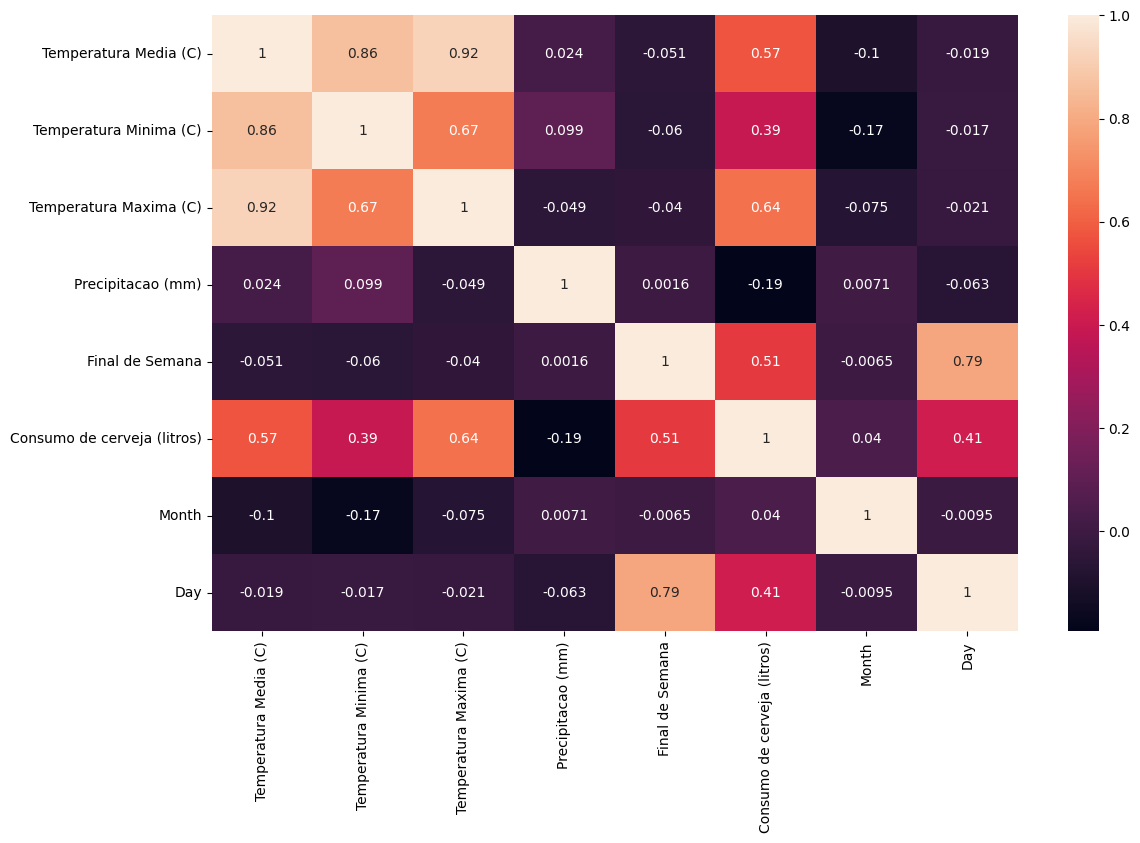

In [16]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(beer_df.corr(), annot=True, ax=ax)

In [17]:
X = beer_df.drop("Consumo de cerveja (litros)", axis=1)
y = beer_df["Consumo de cerveja (litros)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255, 7), (110, 7), (255,), (110,))

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7399971062989981, 0.6968068416186932)

In [19]:
y_preds = model.predict(X_test)

In [20]:
#evaluating the model
r2 = r2_score(y_test, y_preds)
mse = mean_absolute_error(y_test, y_preds)
rmse = math.sqrt(mean_squared_error(y_test, y_preds))

r2, mse, rmse

(0.6968068416186932, 1.8519431103427453, 2.253773538644808)

In [21]:
model.coef_, model.intercept_

(array([-0.05599008,  0.05123602,  0.68047064, -0.06755034,  5.39791837,
         0.12803726, -0.05057815]),
 5.665098274133825)

## <span style="color:lightblue"> **Problem Statement 2:** </span>
I am provided with the california housing dataset. Based on the given parameters of a house, predict its price.

**Dataset Description:**

The dataset contains nine features:
- Longitude: A measure of how far west a house is; a higher value is farther west
- Latitude: A measure of how far north a house is; a higher value is farther north
- hosingMedianAge: Meduan age of a house within a block; a lower number is a newser building
- total rooms: Total number of rooms withina block
- total bedrooms: Total number of bedrooms within a block
- populations: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median house value: Median house value for households within a block (measured in US Dollars)

I'm writing a python code to perform the following tasks mentioned:
1. Load the datam check its shape and check for null values
2. Split the datset for training and testing - 1000- instances for testing
3. Train the model using sklearn (Apply linear regression to train a model for prediction)
4. Predict the prices on test data and evaluate the model by r2 score and mean absolute error
5. Find coefficient and intercept using the trained model

In [24]:
housing_df = pd.read_csv("./../Assignment_files/california_housing_train_ass4.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [27]:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [28]:
housing_df.shape

(17000, 9)

In [35]:
shuffled_df = housing_df.sample(frac=1, random_state=42)
shuffled_df.shape

(17000, 9)

In [43]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8637,-118.54,34.24,24.0,4631.0,1164.0,2360.0,1083.0,3.0977,264000.0
884,-117.08,32.97,3.0,17466.0,3336.0,7644.0,2895.0,5.4584,246500.0
10630,-120.48,34.90,20.0,3842.0,630.0,2490.0,662.0,3.0559,120100.0
6307,-118.25,33.95,48.0,1766.0,424.0,1655.0,420.0,0.9751,95500.0
4209,-117.99,33.68,18.0,2024.0,462.0,1047.0,451.0,3.5848,186900.0


Getting test and train data (making sure that test has 1000 samples)

In [48]:
test_data = shuffled_df.iloc[0:1000]
test_data.shape

train_data = shuffled_df.iloc[1000:]
train_data.shape, test_data.shape

X_train = train_data.drop("median_house_value", axis=1)
X_test = test_data.drop("median_house_value", axis=1)

y_train = train_data.median_house_value
y_test = test_data.median_house_value

#Initialize the model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6410106682980451

In [52]:
#Predict the prices on test data and evaluate the model by r2 score and mean absolute
y_preds = model.predict(X_test)

r2score = r2_score(y_preds, y_test)
mae = mean_absolute_error(y_preds, y_test)
rmse = math.sqrt(mean_squared_error(y_preds, y_test))
r2score, mae, rmse

(0.4104653591986547, 52486.711217711054, 72867.53677522765)

In [55]:
#Task 5: Find coefficient and  intercept using the trained model
model.intercept_, model.coef_

(-3632877.842511851,
 array([-4.32650586e+04, -4.29877050e+04,  1.13224456e+03, -8.24971921e+00,
         1.15173391e+02, -3.72835206e+01,  4.39458716e+01,  4.04437504e+04]))

## <span style="color:lightblue"> **Problem Statement 3:** </span>
I have been provided with the  medical cost dataset. I need to predict individual medical costs billed by health insurance.

Dataset Description:
- age: age of the primary beneficiary
- sex: gender of primary beneficiary female, male
- bmi: Body mass index, providing an understanding of the body, weights that are relatively<br>
  high or low relative to height, an objective index of body.
- weight(kg/m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- Children: Number of children covered by health insurance / Number of dependents
- smoker: Smokes or not
- region: the beneficiary's residential area in the US, northest, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

I would write a python code to perform the following tasks mentioned:
1. Load the datam check its shape and check for null values
2. Convert categorical features to numerical values (Use One-Hot Encoding)
3. Split the dataset for training and testing
4. Train the model using sklearn - Linear Regression
5. Find the intercept and coefficient from the trained model
6. Predict the prices of test data and evalutate the model using calculated r2 score and root mean squared error

## <span style="color:lightblue"> **Problem Statement 4:** </span>
I have been provided with the '50_Startups' data. Using the given features, I must predict the profit of these startups.

**Dataset Description:**
- R&D Spend: Expenditures in Research and Development
- Administration: Expenditures in Administration
- Marketing Spend: Expenditures in Marketing
- State: In which state the company belongs to
- Profit: The profit made by the company

I would write python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values using Label Encoder
3. Split the dataset for training and testing
4. Train the model using sklearn (linear regression), also find the intercept and coefficient from the trained model
5. Predict the profits of test data and evaluate the model using r2 score and mean squared error
6. Regularize the model using Ridge Regression and find the score
7. Regularize the model using Lasso Regeression and find the score